# Parsing GUI results

The **mwarp1d** GUI saves all results in [compressed NPZ format](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.savez_compressed.html). This results file contains the original data, the warping parameters, and the warped data. Results are automatically saved every time the user updates a warp.

The results file can be parsed in one of two ways:

1. Using **numpy.load**
2. Using **mwarp1d.loadnpz**

The examples below consider the example results files:

* ./mwarp1d/examples/data/warps_Dorn2012_landmark.npz
* ./mwarp1d/examples/data/warps_Dorn2012_manual.npz

___

### Using numpy.load (landmark mode)

The results file can be loaded using the usual NumPy approach. Let's first check the variable names that are stored in  landmark mode results.

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import mwarp1d


dirDATA  = mwarp1d.get_data_dir()
fnameNPZ = os.path.join(dirDATA, 'warps_Dorn2012_landmark.npz')

with np.load(fnameNPZ) as Z:
    for key in Z.keys():
        print(key)

mode
filename0
filename1
ydata_template
ydata_sources
ydata_sources_warped
landmarks_template
landmarks_sources
landmark_labels


These variables are:

* **mode** --- warping mode ("landmark" or "manual")
* **filename0** --- the name of the CSV data file (if any) imported into the GUI
* **filename1** --- the name of the NPZ data file (originally specified in the GUI; this is not updated if the NPZ file is relocated)
* **ydata_template** --- template; a (Q,) array, where Q is the number of domain nodes
* **ydata_sources** --- original sources; a (J,Q) array, where J is the number of sources
* **ydata_sources_warped** --- warped sources; a (J,Q) array
* **landmarks_template** --- template landmarks, an (n,) array of integers, where n is the number of landmarks
* **landmarks_sources** --- source landmarks, a (J,n) array of integers
* **landmark_labels** --- landmark, an (n,) array of string labels, one per landmark

Let's first check the mode and data array shapes:

In [2]:
with np.load(fnameNPZ) as Z:
    print( Z['mode'] )
    print( Z['ydata_template'].shape )
    print( Z['ydata_sources'].shape )
    print( Z['ydata_sources_warped'].shape )

landmark
(100,)
(7, 100)
(7, 100)


This implies that the data were warped in "landmark" mode, that there were 7 sources, each represented using 100 domain nodes.

Let's next check the landmark array shapes:

In [3]:
with np.load(fnameNPZ) as Z:
    print( Z['landmarks_template'].shape )
    print( Z['landmarks_sources'].shape )
    print( Z['landmark_labels'].shape )

(4,)
(7, 4)
(4,)


This implies that 4 landmarks were used for each of the 7 sources.

The actual landmarks are: 

In [4]:
with np.load(fnameNPZ) as Z:
    for key in ['landmarks_template', 'landmarks_sources', 'landmark_labels']:
        print('%s:' %key)
        print('%s' %Z[key])
        print()


landmarks_template:
[ 8 14 24 70]

landmarks_sources:
[[ 8 13 23 70]
 [ 8 14 25 70]
 [ 8 14 25 70]
 [10 17 27 72]
 [ 9 16 26 71]
 [10 21 32 72]
 [11 22 33 73]]

landmark_labels:
['C1' 'C2' 'C3' 'C']



The data can be visualized as follows:

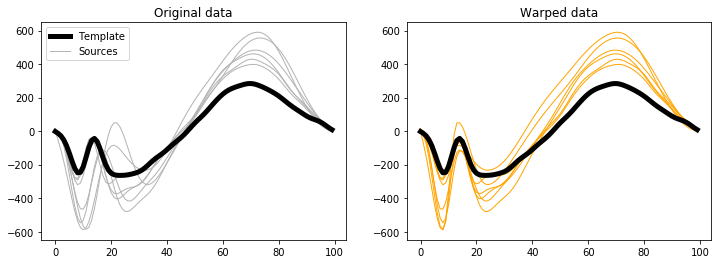

In [5]:
with np.load(fnameNPZ) as Z:
    y0  = Z['ydata_template']
    y   = Z['ydata_sources']
    yw  = Z['ydata_sources_warped']

    
plt.figure( figsize=(12,4) )

ax  = plt.subplot(121)
h0  = ax.plot(y0,  'k', lw=5, zorder=1)[0]
h1  = ax.plot(y.T, '0.7', lw=1, zorder=0)[0]
ax.legend([h0,h1], ['Template','Sources'])
ax.set_title('Original data')

ax  = plt.subplot(122)
ax.plot(y0,  'k', lw=5, zorder=1)
ax.plot(yw.T, 'orange', lw=1, zorder=0)
ax.set_title('Warped data')


plt.show()

___

### Using numpy.load (manual mode)

The variables saved for the manual warping mode are:

In [6]:
fnameNPZ = os.path.join(dirDATA, 'warps_Dorn2012_manual.npz')

with np.load(fnameNPZ) as Z:
    for key in Z.keys():
        print(key)

mode
filename0
filename1
ydata_template
ydata_sources
ydata_sources_warped
seqwarps


"seqwarps" is the only new variable;  not also that the "landmarks*" variables do not appear in manual mode.

* **seqwarps** --- a (J,) array of objects, where each object is an array of sequential manual warp parameters.

In order to read **seqwarps**, the NPZ file must be loaded in "allow_pickle" mode as follows.

In [7]:
with np.load(fnameNPZ, allow_pickle=True) as Z:
    seqwarps = Z['seqwarps']
    
print(seqwarps)

[None None
 array([[0.03539823, 0.24285714, 0.162     , 0.162     ],
       [0.02758621, 0.27142857, 0.092     , 0.092     ]])
 array([[-0.24175824,  0.15714286,  0.396     ,  0.396     ],
       [ 0.09447005,  0.27142857,  0.07      ,  0.07      ],
       [-0.01442308,  0.7       ,  0.19      ,  0.19      ]])
 None
 array([[-0.32      ,  0.47142857,  0.99      ,  0.99      ],
       [ 0.12727273,  0.61428571,  0.476     ,  0.476     ],
       [-0.08      ,  0.18571429,  0.87      ,  0.        ]])
 array([[-0.35493827,  0.54285714,  0.962     ,  0.962     ],
       [ 0.05022831,  0.27142857,  0.328     ,  0.328     ],
       [ 0.14479638,  0.61428571,  0.774     ,  0.774     ],
       [-0.3       ,  0.        ,  0.04      ,  0.04      ]])]


Note that the elements of **seqwarps** are either None or an (m,4) array, where m is the number of warps applied to the given source, and 4 is the number of manual warp parameters (i.e., amp, center, head, tail).

For example, the sequential warp parameters for the third source can be retrieved using:

In [8]:
sw = seqwarps[2]

print(sw)

[[0.03539823 0.24285714 0.162      0.162     ]
 [0.02758621 0.27142857 0.092      0.092     ]]


These parameters could then be used in conjunction with the **SequentialManualWarp** class to reconstruct **ydata_sources_warped**.

However, if you wish to use these saved warping results (either landmark or manual mode results) to warp data, it is much easier to use **mwarp1d.loadnpz** as described below.

___

### Using mwarp1d.loadnpz

The NPZ results files can alternatively be loaded using **mwarp1d.loadnpz**:


In [9]:
results = mwarp1d.loadnpz(fnameNPZ)

print(results)

MWarpResults
----- Overview -------------
    mode           = manual
    nsources       = 7
    nnodes         = 100
----- 1D Data -------------
    sources        = (7,100) array
    sources_warped = (7,100) array
    template       = (100,) array



Summary information is displayed, and all parameters can be accessed as attributes like this:

In [10]:
print( results.mode )
print( results.nsources )
print( results.nnodes )
print( results.sources.shape )

manual
7
100
(7, 100)


and visualized like this:

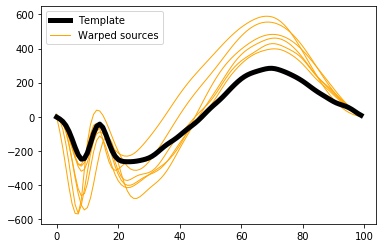

In [11]:
plt.figure()
ax  = plt.axes()
h0  = ax.plot(results.template,  'k', lw=5, zorder=1)[0]
h1  = ax.plot(results.sources_warped.T, 'orange', lw=1, zorder=0)[0]
ax.legend([h0,h1], ['Template','Warped sources'])
plt.show()

The most useful feature of this **loadnpz** procedure is the **apply_warps** method, which can be used to warp arbitrary data. For example, to reproduce the saved warped sources, simply submit the original sources to **apply_warps** like this:

In [12]:
y0 = results.template
y  = results.sources
yw = results.sources_warped

ywcheck = results.apply_warps( y )

Then compare the results:

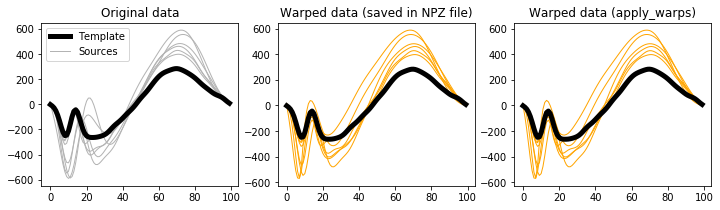

In [13]:
plt.figure( figsize=(12,3) )

ax  = plt.subplot(131)
h0  = ax.plot(y0,  'k', lw=5, zorder=1)[0]
h1  = ax.plot(y.T, '0.7', lw=1, zorder=0)[0]
ax.legend([h0,h1], ['Template','Sources'])
ax.set_title('Original data')

ax  = plt.subplot(132)
ax.plot(y0,  'k', lw=5, zorder=1)
ax.plot(yw.T, 'orange', lw=1, zorder=0)
ax.set_title('Warped data (saved in NPZ file)')

ax  = plt.subplot(133)
ax.plot(y0,  'k', lw=5, zorder=1)
ax.plot(ywcheck.T, 'orange', lw=1, zorder=0)
ax.set_title('Warped data (apply_warps)')

plt.show()

This **apply_warps** procedure can also be applied to landmark warps:

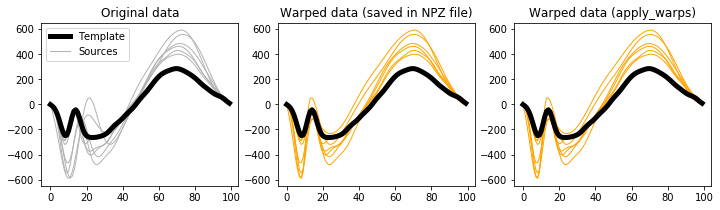

In [14]:
dirDATA  = mwarp1d.get_data_dir()
fnameNPZ = os.path.join(dirDATA, 'warps_Dorn2012_landmark.npz')
results  = mwarp1d.loadnpz(fnameNPZ)

y0       = results.template
y        = results.sources
yw       = results.sources_warped
ywcheck  = results.apply_warps( y )




plt.figure( figsize=(12,3) )

ax  = plt.subplot(131)
h0  = ax.plot(y0,  'k', lw=5, zorder=1)[0]
h1  = ax.plot(y.T, '0.7', lw=1, zorder=0)[0]
ax.legend([h0,h1], ['Template','Sources'])
ax.set_title('Original data')

ax  = plt.subplot(132)
ax.plot(y0,  'k', lw=5, zorder=1)
ax.plot(yw.T, 'orange', lw=1, zorder=0)
ax.set_title('Warped data (saved in NPZ file)')

ax  = plt.subplot(133)
ax.plot(y0,  'k', lw=5, zorder=1)
ax.plot(ywcheck.T, 'orange', lw=1, zorder=0)
ax.set_title('Warped data (apply_warps)')

plt.show()

This feature is particularly useful when you want to apply warps to multivariate 1D data, as demonstrated in  [Apply GUI warps](apply.ipynb)